# 主題 01-3. 作業: 改造你的 1 號神經網路

本週的作業很簡單, 就是把上課手寫辨識的範例改造一下, 看能不能讓成效變得更好。因為是第一次作業, 我們不特別要求要達到什麼水準, 只要「測試資料」的正確率還在 9 成以上就可以。我們這美好的 MNIST 例子, 你基本上亂亂作都是可以達成的, 不用擔心!

【註】因 TensorFlow 2 已做了一些改變, 例如完全整合了 Keras。到 2021 年的今天, 有一些細節也做了調整。因此我們依新的規範修改了程式。最大的不同是, 以後大家直接安裝 tensorflow 即可, 不用再另外裝 keras。

## 1. 初始準備

這裡是一樣的我們不再說明。

再來是我們標準數據分析動作!

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 2. 讀入 MNIST 數據庫

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## 3. 改造你的神經網路

### 3.1 改變結構

我們本來用了兩層的隱藏層, 你可以改不同層數試試。比方說, 你可以試真的「深度學習」, 也就是隱藏層加到 3 層或以上。不過你需要有電腦彷如當機的心理準備...

另外也可改變神經元的數目。比如說本來是這樣設的一個隱藏層, 我們用了 500 個神經元是這樣寫的。

    model.add(Dense(500))
    model.add(Activation('sigmoid'))
    
因此如果要改 520 個神經元, 就會像這樣:

    model.add(Dense(520))
    model.add(Activation('sigmoid'))
    
是不是很簡單?

### 3.2 換個 activation function!

在 Keras 中要換個 activation function 很簡單, 比如說我們要換當巨星 ReLU, 就在每層設 activation function 時說就好了。

    model.add(Dense(500))
    model.add(Activation('relu'))

## 4. Normalize 我們的數據

我們的每筆輸入是 784 維的

$$\mathbf{x} = (x_1, x_2, \ldots, x_{784})$$

我們會說這個神經網路有 784 個 features。現在我們每一個 $x_i$ 都是 0 到 255 的整數, 我們常喜歡把每個 $x_i$ 壓縮到一個更小的範圍, 一般有兩種作法:

1. 每個 $x_i$ 都壓到 [0,1] 中的一個數
2. 讓每個 $x_i$ 由平均值是 0, 標準差是 1 的

我們的例子來做做看!

In [4]:
x_train = x_train/255
x_test = x_test/255

可以試試看就知道, 真的都壓到 0-1 之間的數。

In [5]:
# x_train[87]

還是可以畫的哦! 指令和以前完全一樣!

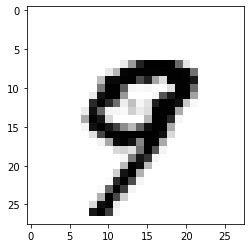

In [6]:
plt.imshow(x_train[87], cmap='Greys')

把輸入的資料做 normalization 是很好的習慣。原因有好幾個, 比方說:

1. 每個 feature 範圍不同時, 常常會由數值大的主導。Normalization 可以避免這種事情發生。
2. 因為像 ReLU 在大於零的部份就是 $f(x) = x$ 這樣的函數, $x$ 越大, 值就越大, 甚至非常大。
3. 再來是穩定性的問題, 神經網路的學理研究就喜歡把所有 feature, 所有 weight 都假設在「平均值 0, 標準差 1」的常態分布。這樣的狀況也證實有各種良好特質。

## 5. 優化方式的調整

### 5.1 改善學習方式的兩大考量

我們用 SGD 可以說是最標準的方式, 事實上所有優化 (學習) 方式基本上都是 gradient descent。不過我們有兩大方向可以考量改善:

#### (1) 加入 momentum

想像我們的 loss function 畫出來像一座高低起伏的山, 我們在山中的某一個點, 想要走到山下。Gradient descent 會帶我們從「目前看到下坡最陡的方向」下山。但是走了兩步後我們可能發現 gradient descent 又說要走另一個方向。於是在那繞來繞去才終於下山。因此我們想要以更「穩定而勇敢」的方式, 比較朝向一個目標前進, 就加入所謂的 momentum。

#### (2) learning rate 變速器

我們說 learning rate 調夠小, 我們的神經網路基本上都該收斂的。不過調太小可能學非常慢, 大了一點又怕跳過頭。於是有一些「變速」的方式被研發出來, 一般的原則就是「開始快、接近目標時變慢」。

### 5.2 在 Keras 選用不同學習法!


我們就先 import 想要的學習法, 如果不知道可以考慮用 Adam, 前兩大項考量 Adam 都有考慮進去!

    from keras.optimizers import Adam

然後在 compile 時說要用 Adam 即可。

    model.compile(loss='mse', optimizer=Adam(), metrics=['accuracy'])

Adam 其實有些參數可調, 但我們這暫不多談。